*Código para avaliação de nuvens de palavras em relação a uma marca no Twitter (PEPSI)*

In [1]:
#Importação do pacote tweepy

!pip install tweepy


In [2]:
#Importação do pacote Pymongo

!pip install pymongo


In [3]:
#Utilizando os pacotes Datetime, Json e tweepy

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from datetime import datetime
import json

In [4]:
#Dados da API criada no twiter para análise

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

In [5]:
#Chaves de autenticação

auth = OAuthHandler(consumer_key, consumer_secret)


In [6]:
auth.set_access_token(access_token, access_token_secret)

In [7]:
#Armazenamento no Banco de Dados NoSQL MongoDB

class Minhalista(StreamListener):       #Classe para importação de dados sempre que necessário
    def on_data(self, dados):
        tweet = json.loads(dados)       #Importação de dados no formato Json para o MongoDB
        created_at = tweet["created_at"]
        id_str = tweet["id_str"]
        text = tweet["text"]
        obj = {"created_at":created_at,"id_str":id_str,"text":text,}   #Criação de dicionário para armazenamento de tweets
        tweetind = col.insert_one(obj).inserted_id
        print (obj)
        return True

In [8]:
#Criando objeto minhalista 

minhalista = Minhalista()

mystream = Stream(auth, listener = minhalista)

*ABAIXO A PREPARAÇÃO PARA A CONEXÃO REALIZADA COM O BANCO DE DADOS NOSQL MONGO DB*

In [11]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
                     
db = client.twitterdb
                     
col = db.tweets

keywords = ["pepsi","coca","fanta","guarana"]
                     

*COLETANDO OS DADOS*


In [12]:
#Gravando os tweets relacionados

mystream.filter(track = keywords)


{'created_at': 'Fri May 21 20:05:25 +0000 2021', 'id_str': '1395833127348678658', 'text': 'RT @HELIODOPTERO: Camionetas con placas superpuestas en Ciudad Jardín, el barrio de los carteles de la cocaína en Cali. La @PoliciaColombia…', '_id': ObjectId('60a81289ea5c4e7398d07108')}
{'created_at': 'Fri May 21 20:05:25 +0000 2021', 'id_str': '1395833129030533124', 'text': '@_TrevorC @MountainDew I used to drive a combo truck route for Pepsi and fill vending machines. If you got that out… https://t.co/P1hksfIkJP', '_id': ObjectId('60a81289ea5c4e7398d07109')}
{'created_at': 'Fri May 21 20:05:26 +0000 2021', 'id_str': '1395833132725772290', 'text': '@danoris2110 @NonnoUltras Effettivamente poteva esser la disidratazione. Modello coca cola.', '_id': ObjectId('60a8128aea5c4e7398d0710a')}
{'created_at': 'Fri May 21 20:05:27 +0000 2021', 'id_str': '1395833137331048453', 'text': '@CocaCola_Br coca cola eu te amo muito sério me manda coquinha geladinha na minha casa e eu digo se esperava ou não', '_i

{'created_at': 'Fri May 21 20:06:04 +0000 2021', 'id_str': '1395833290624487424', 'text': 'RT @LawCur: #Drink @pepsi @PepsiGlobal @PepsiCo @PepsiIndia @PepsiCoIndia @Pepsi_Naija @pepsiphl @PepsiMaxUK @pepsico_uk @PepsiCoArabia @Pe…', '_id': ObjectId('60a812b0ea5c4e7398d0712c')}
{'created_at': 'Fri May 21 20:06:04 +0000 2021', 'id_str': '1395833292377710600', 'text': 'Agora um assunto sério, coca cola com queijo é melhor invenção do homem', '_id': ObjectId('60a812b0ea5c4e7398d0712d')}
{'created_at': 'Fri May 21 20:06:04 +0000 2021', 'id_str': '1395833292805521409', 'text': '🌟🇧🇷', '_id': ObjectId('60a812b0ea5c4e7398d0712e')}
{'created_at': 'Fri May 21 20:06:05 +0000 2021', 'id_str': '1395833293887651849', 'text': 'RT @GenPenaloza: El general Reverol era un delincuente al servicio de Makled, quien le pagaba millones de $$ al mes por permitirle pasar co…', '_id': ObjectId('60a812b1ea5c4e7398d0712f')}
{'created_at': 'Fri May 21 20:06:06 +0000 2021', 'id_str': '1395833297549336582', 'text': 

{'created_at': 'Fri May 21 20:06:36 +0000 2021', 'id_str': '1395833426054418432', 'text': '@jeremotas2003 2 kilos de coca por tus sprites privados', '_id': ObjectId('60a812d0ea5c4e7398d07150')}
{'created_at': 'Fri May 21 20:06:37 +0000 2021', 'id_str': '1395833427576897539', 'text': 'RT @PlNKITTY: ustedes: aay, respetamos a las personas trans y no binarias!! todes son belles &lt;3\n* sam smith se declara una persona no binar…', '_id': ObjectId('60a812d0ea5c4e7398d07151')}
{'created_at': 'Fri May 21 20:06:37 +0000 2021', 'id_str': '1395833427736383495', 'text': '#bloedsponsor #bloodsponsor Time for some attention to the major sponsors for the Championship in Qatar, start taki… https://t.co/kzpkefGVlz', '_id': ObjectId('60a812d0ea5c4e7398d07152')}
{'created_at': 'Fri May 21 20:06:38 +0000 2021', 'id_str': '1395833433352400896', 'text': '@ElGab Falta la Fanta de fresa 😍', '_id': ObjectId('60a812d2ea5c4e7398d07153')}
{'created_at': 'Fri May 21 20:06:39 +0000 2021', 'id_str': '1395833437945

{'created_at': 'Fri May 21 20:06:59 +0000 2021', 'id_str': '1395833520669478912', 'text': 'Que ganas de una Coca-Cola bien fría 😍🤤', '_id': ObjectId('60a812e7ea5c4e7398d07174')}
{'created_at': 'Fri May 21 20:06:59 +0000 2021', 'id_str': '1395833521248276481', 'text': 'qué buena la pepsi max de lima JODER', '_id': ObjectId('60a812e7ea5c4e7398d07175')}
{'created_at': 'Fri May 21 20:07:00 +0000 2021', 'id_str': '1395833524045893636', 'text': '@guarana A', '_id': ObjectId('60a812e7ea5c4e7398d07176')}
{'created_at': 'Fri May 21 20:07:01 +0000 2021', 'id_str': '1395833528701566976', 'text': "Jack Miel Coca J'decolle", '_id': ObjectId('60a812e8ea5c4e7398d07177')}
{'created_at': 'Fri May 21 20:07:01 +0000 2021', 'id_str': '1395833530509373445', 'text': '@Henryz_gg @guarana ?', '_id': ObjectId('60a812e9ea5c4e7398d07178')}
{'created_at': 'Fri May 21 20:07:02 +0000 2021', 'id_str': '1395833535408185345', 'text': 'you guys should try mango flavored pepsi', '_id': ObjectId('60a812eaea5c4e7398d07179

{'created_at': 'Fri May 21 20:07:28 +0000 2021', 'id_str': '1395833641570287618', 'text': '@medicinexwalls_ soy un yankee adicto por su coca aporvecja las horas que son pocas \n#Harries #MelhorFandom… https://t.co/l67Loo6VyL', '_id': ObjectId('60a81303ea5c4e7398d07199')}
{'created_at': 'Fri May 21 20:07:28 +0000 2021', 'id_str': '1395833644300783621', 'text': 'RT @arancibialeo10: Con una coca de vidrio y viendo los simpson. https://t.co/bAbK8DLNg9', '_id': ObjectId('60a81304ea5c4e7398d0719a')}
{'created_at': 'Fri May 21 20:07:29 +0000 2021', 'id_str': '1395833648243413000', 'text': 'Que ganas de una coca de 3 lts', '_id': ObjectId('60a81305ea5c4e7398d0719b')}
{'created_at': 'Fri May 21 20:07:30 +0000 2021', 'id_str': '1395833652555259911', 'text': '@scxttjahobrien @guarana Sem choro, hein! Vai levar ponto negativo!', '_id': ObjectId('60a81306ea5c4e7398d0719c')}
{'created_at': 'Fri May 21 20:07:33 +0000 2021', 'id_str': '1395833665293230084', 'text': 'quien para', '_id': ObjectId('60a81

KeyboardInterrupt: 

AGORA VAMOS CONSULTAR OS DADOS CAPTADOS ATRAVÉS DO BANCO DE DADOS NOSQL MONGO DB

In [13]:
#Primeiro cria-se o dataset

dataset = [{"created_at": item["created_at"], "text": item["text"],} for item in col.find()]



In [14]:
#Importando o pandas

import pandas as pd


In [15]:
#Criando o dataframe

df = pd. DataFrame(dataset) 

In [16]:
#Impressão do Dataframe

df

,created_at,text
0,Fri May 21 19:57:58 +0000 2021,"@Alelopes81Lopes ""Teatro de tesouras?""\n\nEssa..."
1,Fri May 21 19:57:58 +0000 2021,@coi_leray Want a Pepsi?
2,Fri May 21 19:58:01 +0000 2021,"RT @pepsiphl: Walang makakapigil sa’tin, Pepsi..."
3,Fri May 21 19:58:02 +0000 2021,RT @ThatUrhoboGirl: So this lady saw her husba...
4,Fri May 21 19:58:08 +0000 2021,"hi amazing user of the bird app, pepsi or cola..."
...,...,...
222,Fri May 21 20:07:57 +0000 2021,"Pra hoje só queria um artesanal bem pika, bata..."
223,Fri May 21 20:07:58 +0000 2021,@Ludum6 Dije persona sana y me recomendás Coca...
224,Fri May 21 20:07:58 +0000 2021,RT @AndresAlonsook: Y hoooy? Tengo ganas de un...
225,Fri May 21 20:07:59 +0000 2021,"@guarana reduziu em 15,65% a quantidade do caç..."


In [17]:
#Utilizando o módulo SkicitLearn

import sklearn
sklearn.__version__

'0.22.1'

In [19]:
# Importando o módulo Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# Usando o método CountVectorizer para criar uma matriz de documentos
cv = CountVectorizer()
count_matrix = cv.fit_transform(df.text)

In [37]:
# Contando o número de ocorrências das principais palavras em nosso dataset
word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,de,119
1,rt,85
2,coca,76
3,co,72
4,https,70
5,pepsi,62
6,la,59
7,en,43
8,cola,40
9,con,39


In [23]:
#Instalando Wordcloud

!pip install WordCloud

In [38]:
#import necessary libraries

#for importing data and wrangling
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

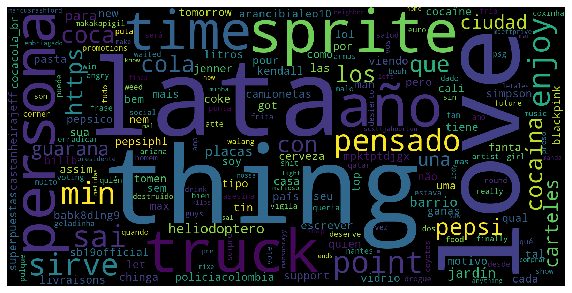

In [39]:
# eliminar as colunas com valores ausentes
summary = word_count.dropna(subset=['word'], axis=0)['word']

# concatenar as palavras
all_summary = " ".join(s for s in summary)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","and", "pra", "su"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      min_word_length = 3,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
                      
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("projeto_summary_wordcloud.png")